In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from gee_scripts.randomforest import get_regressor



In [3]:
#---------------------------------------------------
# for plotting purposes we use this iPython magic
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (19, 19)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1. Read training data

In [4]:
# read phu regions shapefile
phu_regions = gpd.read_file("data/0_shp/AOI__Province__865_PHUs__INDONESIA.gpkg")
phu_regions

,island,province,phu_name,aoi_phu,tile_id,phu_id,geometry
0,Kalimantan,West Kalimantan,KHG Sungai Akar,KAL_User_11,11.0,0,"POLYGON ((110.97207 0.22002, 110.97214 0.21999..."
1,Kalimantan,West Kalimantan,KHG Sungai Ambawang - Sungai Kubu,KAL_User_11,11.0,1,"POLYGON ((109.10649 -0.34808, 109.10657 -0.348..."
2,Kalimantan,West Kalimantan,KHG Sungai Ambawang - Sungai Landak,KAL_User_11,11.0,2,"POLYGON ((109.95178 0.04852, 109.94685 0.04852..."
3,Kalimantan,West Kalimantan,KHG Sungai Batang Kalis - Sungai Maday,KAL_User_11,11.0,3,"POLYGON ((113.02373 0.67076, 113.02471 0.66952..."
4,Kalimantan,West Kalimantan,KHG Sungai Belimbing - Sungai Menunuh,KAL_User_11,11.0,4,"POLYGON ((111.66382 -0.32873, 111.66458 -0.331..."
...,...,...,...,...,...,...,...
878,Sumatera,North Sumatera,KHG Sungai Kualuh Bilah - Sungai Barumun,SUM_User_2,2.0,878,"POLYGON ((100.21264 2.10065, 100.21220 2.10074..."
879,Sumatera,North Sumatera,KHG Sungai Kuo - Sungai Kualuh Bilah,SUM_User_2,2.0,879,"POLYGON ((100.07453 2.31025, 100.07405 2.30960..."
880,Sumatera,North Sumatera,KHG Sungai Leidong - Sungai Kuala,SUM_User_2,2.0,880,"POLYGON ((99.93548 2.75327, 99.93526 2.75309, ..."
881,Sumatera,North Sumatera,KHG Sungai Marbau - Sungai Kualuh Bilah,SUM_User_2,2.0,881,"POLYGON ((100.04374 2.26517, 100.04418 2.26503..."


In [5]:
df = pd.read_csv("data/9_clean_training_data/clean_training_data.csv")

# Convert to GeoDataFrame
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

In [6]:
# Get the number of cases per PHU
phu_cases = df.groupby("phu_id").size().reset_index(name="observations")

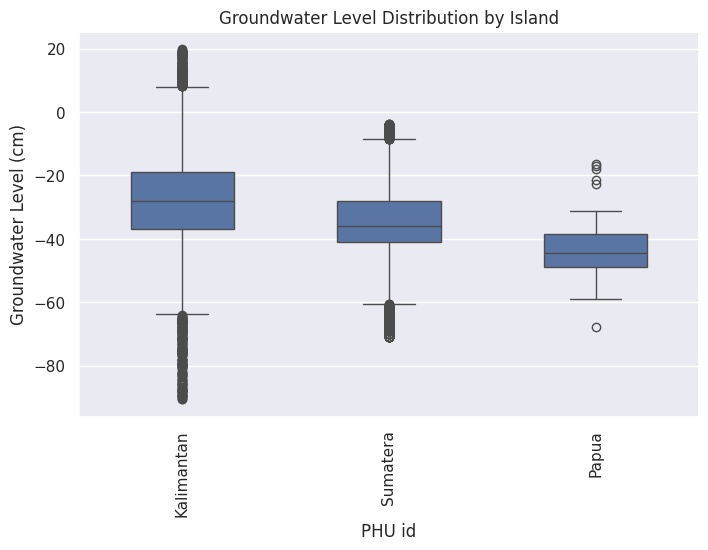

In [7]:
# get a boxplot of response var per region but use a small graph size

# set the seaborn style and size
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="island", y="gwl_cm", data=df, width=0.5)

# Rename x-axis with phu id
plt.xticks(rotation=90)
plt.xlabel("PHU id")
plt.ylabel("Groundwater Level (cm)")
plt.title("Groundwater Level Distribution by Island")
plt.show()

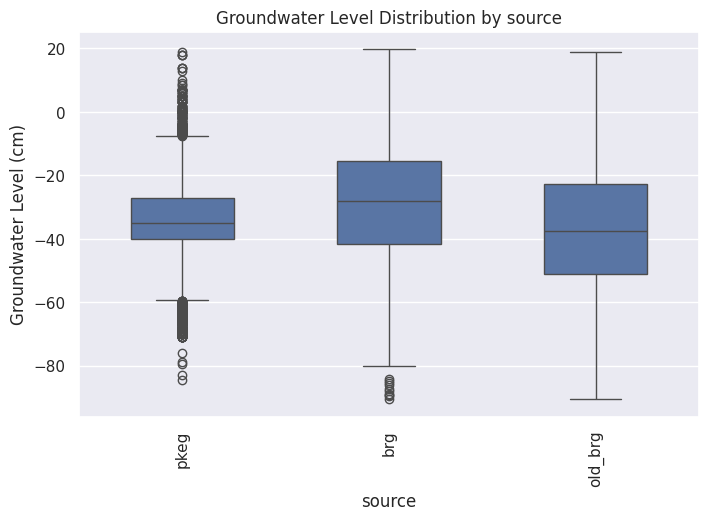

In [8]:
# get a boxplot of response var per region but use a small graph size

# set the seaborn style and size
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="source", y="gwl_cm", data=df, width=0.5)

# Rename x-axis with phu id
plt.xticks(rotation=90)
plt.xlabel("source")
plt.ylabel("Groundwater Level (cm)")
plt.title("Groundwater Level Distribution by source")
plt.show()

Text(0.5, 1.0, 'Groundwater Level Distribution by Province')

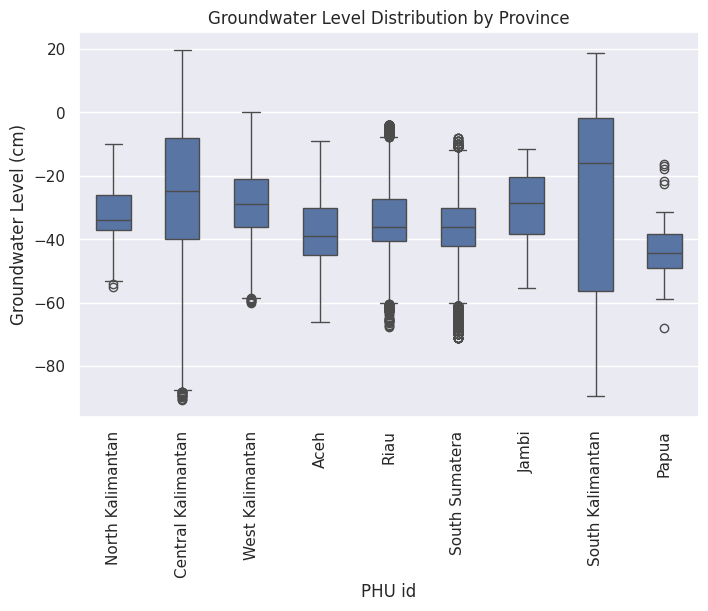

In [9]:
# get a boxplot of response var per region but use a small graph size

# set the seaborn style and size
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="province", y="gwl_cm", data=df, width=0.5)

# Rename x-axis with phu id
plt.xticks(rotation=90)
plt.xlabel("PHU id")
plt.ylabel("Groundwater Level (cm)")
plt.title("Groundwater Level Distribution by Province")

## Create a boxplot showing the number of dates per each point

In [10]:
# group by id and get the number of dates for each id
df_grouped = df.groupby("phu_name").count().reset_index()
df_grouped = df_grouped[["phu_name", "date"]]
df_grouped.columns = ["name", "date_count"]
df_grouped.sort_values(by="date_count", ascending=False)

,name,date_count
39,KHG Sungai Sugihan - Sungai Lumpur,7565
37,KHG Sungai Siak - Sungai Kampar,7042
3,KHG Pulau Padang,2589
33,KHG Sungai Rokan - Sungai Siak Kecil,2386
40,KHG Sungai Terentang - Sungai Kapuas,1543
27,KHG Sungai Merang - Sungai Ngirawan,1290
22,KHG Sungai Lalan - Sungai Merang,1044
38,KHG Sungai Siak Kecil - Sungai Siak,869
18,KHG Sungai Kapuas - Sungai Mendawak,848
13,KHG Sungai Kahayan - Sungai Sebangau,787


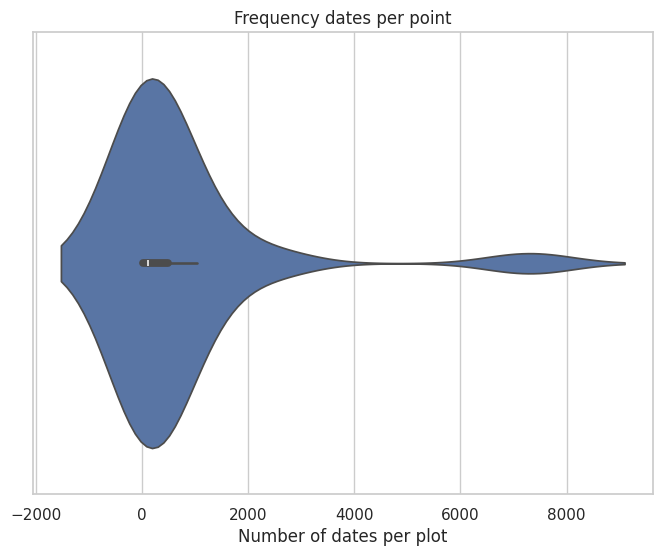

In [11]:
# Define the dimensions of the plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a violin plot for the variable
sns.violinplot(x=df_grouped["date_count"])

# Set the title and x-axis label
plt.title(f"Frequency dates per point")
plt.xlabel("Number of dates per plot")

plt.show()

In [12]:
# drop all stations with less tan 9 observations
min_obs = 9
df.groupby('id').agg({'date': 'count'}).sort_values(by='date', ascending=False).reset_index()
df = df.groupby('id').filter(lambda group: len(group) >= min_obs)

In [13]:
from gee_scripts.parameters import explain_vars, response_var
print("dependent var", response_var)
print("explanatory lenght", len(explain_vars))

dependent var ['gwl_cm']
explanatory lenght 28


# 2. Define a model

## All but one test over stations

In [14]:
from gee_scripts.randomforest import run_randomforest
from gee_scripts.randomforest import get_heatmap

In [15]:
variable = 'gwl_cm'


high_corr_ids = pd.read_csv("data/high_corr_0.3_temporal_variables.csv")
high_corr_ids.columns = ["id"]

# training_df = df[
#     (df.island == "Kalimantan") & 
#     (df.id.isin(high_corr_ids.id.unique()))
# ]

# Manually selected PHU for training
high_corr_phu_ids = [
    136,
    137,
    138,
    143
]
training_df = df[
    (df.phu_id.isin(high_corr_phu_ids))
]

stats_df = run_randomforest(training_df, type_="allbutone")

total points: 1331
total stations: 36
Starting random forest model...


36it [00:59,  1.65s/it]


<Axes: >

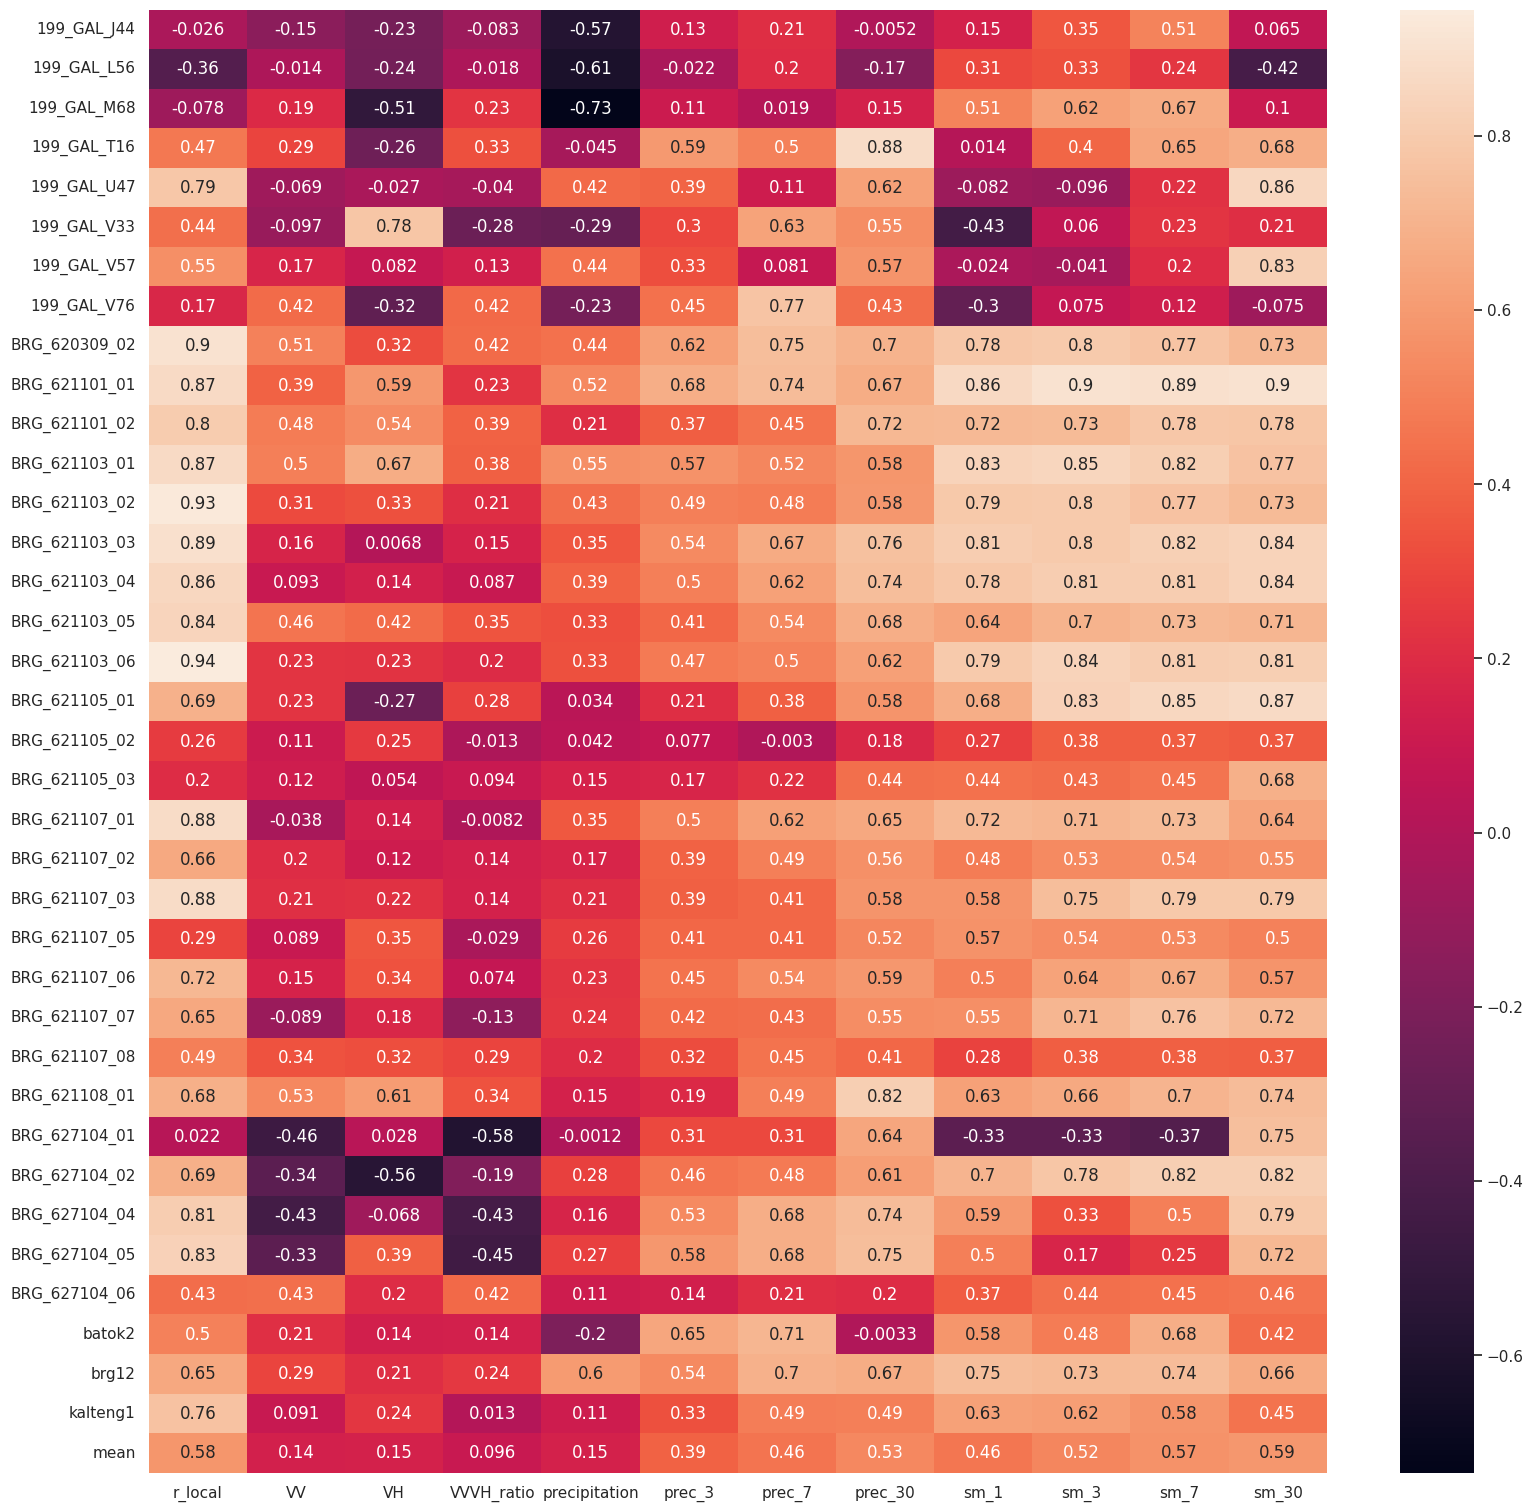

In [18]:
get_heatmap(stats_df, "r_local")

<Axes: >

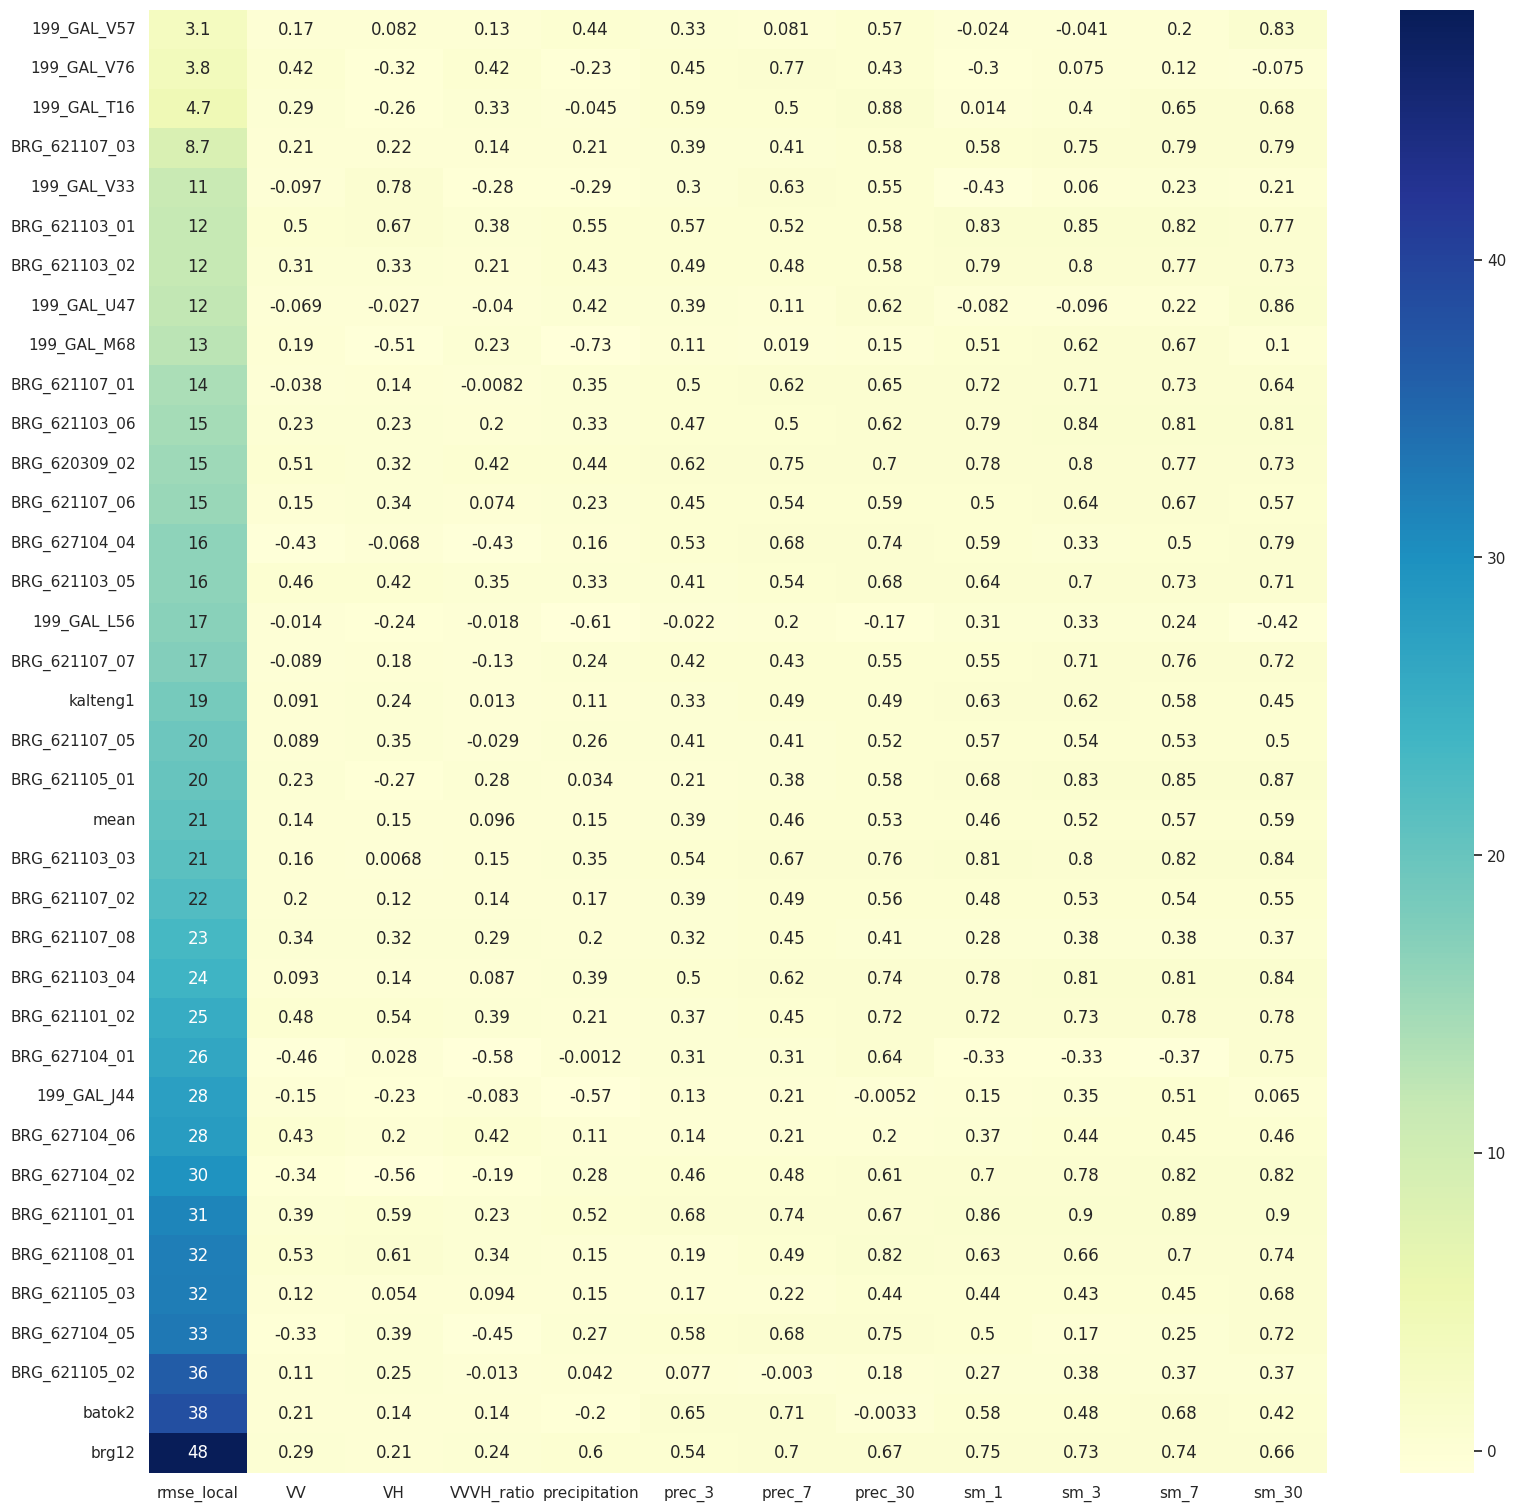

In [19]:
get_heatmap(stats_df, "rmse_local")

In [ ]:
# Change parameters, play with different datasets

training_df = df[
    (df.island == "Kalimantan") & 
    (df.id.isin(high_corr_ids.id.unique()))
]
stats_df = run_randomforest(training_df, type_="allbutone")

In [ ]:
# count the number of values per station
training_df.groupby('id').agg({'date': 'count'}).sort_values(by='date', ascending=False).reset_index()

## Select best stations

In [23]:
best_stations = stats_df[stats_df.r_local > 0.5].sort_values(by="r_local", ascending=False).index
best_stations
len(best_stations)

25

## Model with best stations over all stations

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import numpy as np
from gee_scripts.parameters import explain_vars, temporal_expl

In [24]:
# split gdf into good statoins for train
gdf_high = training_df[training_df.id.isin(best_stations)].copy()
# and bad stations for test
gdf_low = training_df[~training_df.id.isin(best_stations)].copy()

variable = 'gwl_cm'

# create and train classifier
regr = get_regressor()

regr.fit(gdf_high[explain_vars], gdf_high[variable])


row = {}
#rmse_list = []
for station in gdf_low.id.unique():
    explans = []
    # apply model to specific station
    gdf_test = gdf_low[gdf_low.id == station]
    y_pred_test = regr.predict(gdf_test[explain_vars])

    # get pearsons r
    r, p = pearsonr(gdf_test[variable].values, y_pred_test)
    explans.append(r)

    explans.append(np.sqrt(mean_squared_error(gdf_test[variable].values, y_pred_test)))

    # add correlation of explanatories
    for expl in temporal_expl:
        explans.append(gdf_test[variable].corr(gdf_test[expl]))
     
    row[station] = explans
    #row[station] = [np.sqrt(mean_squared_error(gdf_test[variable].values, y_pred_test))]
    #print(row)
    
stats_df = pd.DataFrame.from_dict(row, orient='index')

<Axes: >

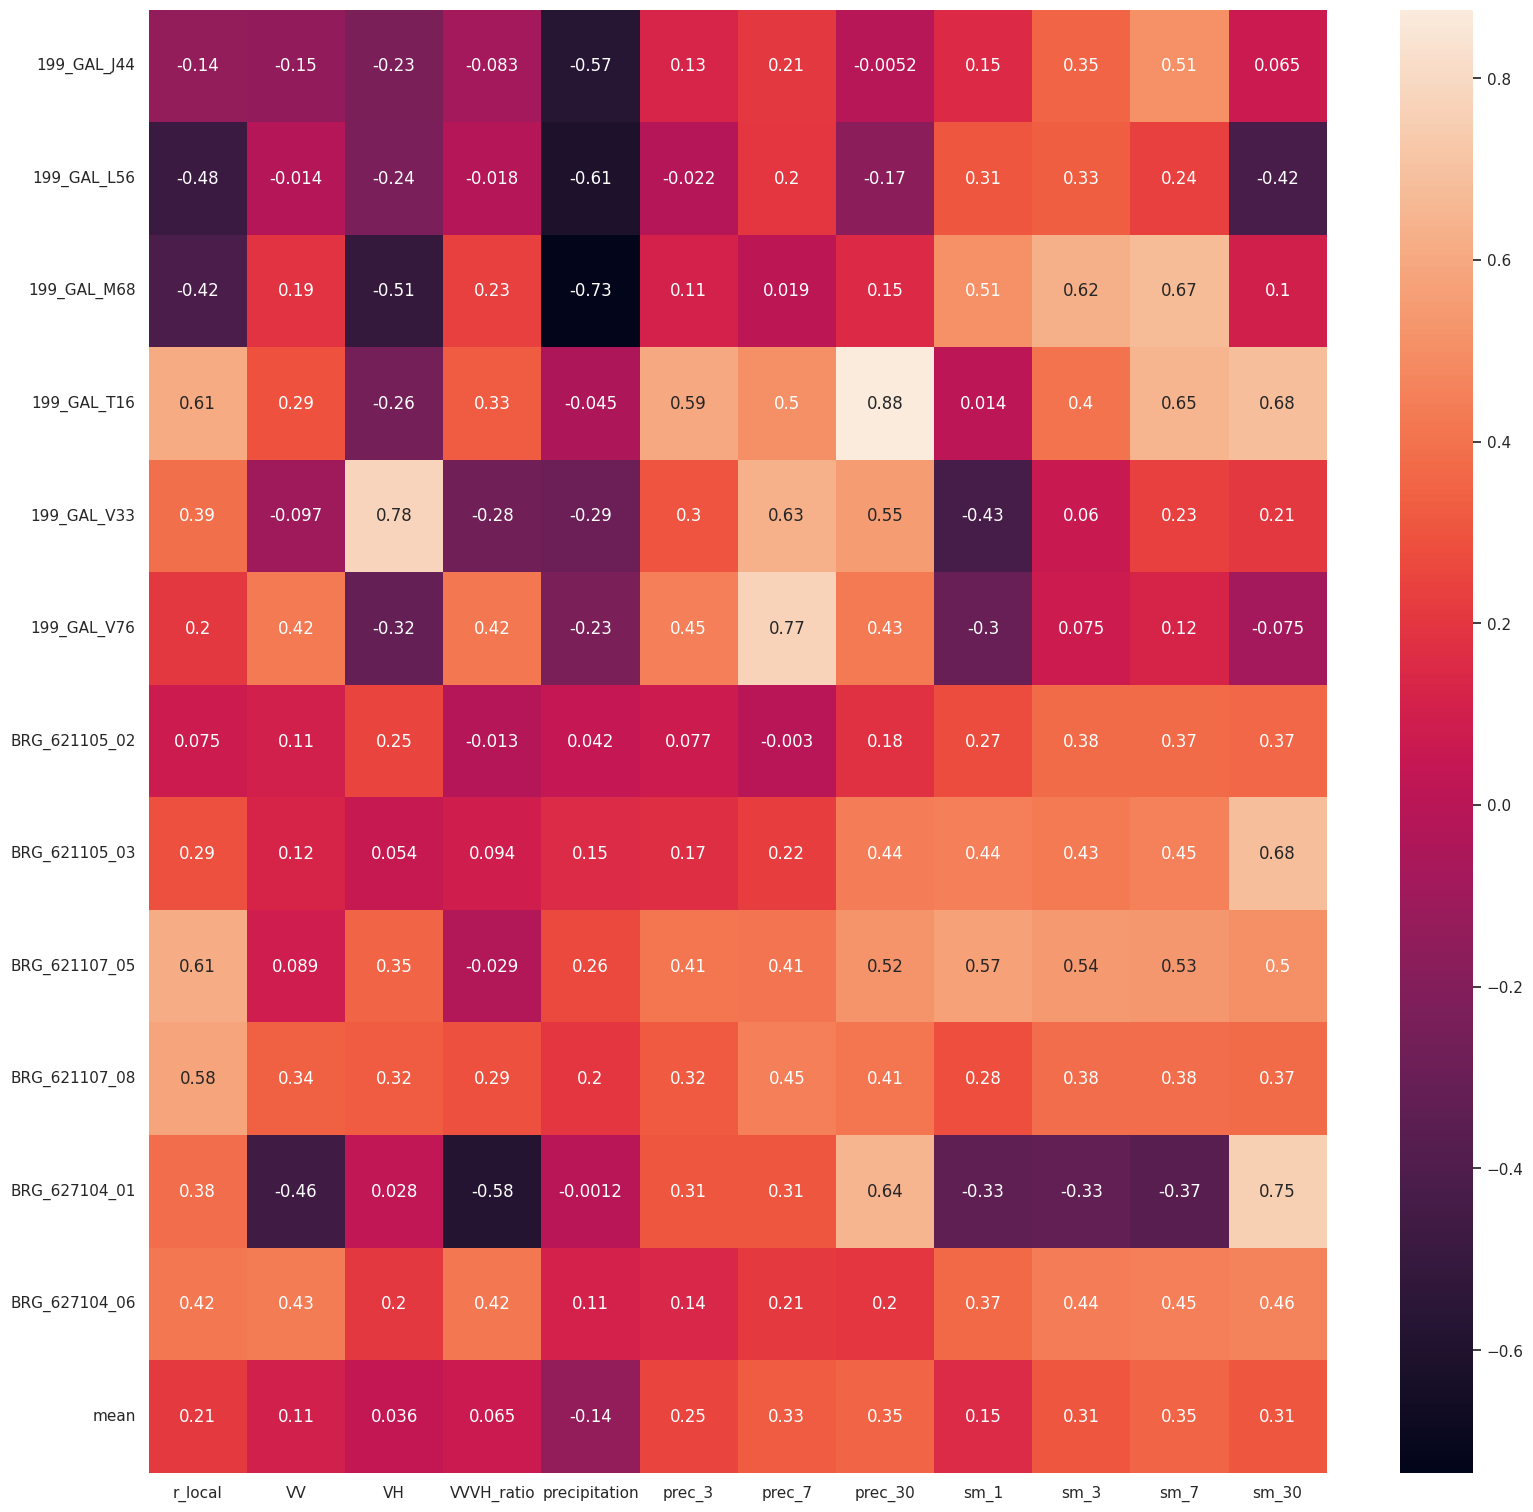

In [26]:
get_heatmap(stats_df, "r_local")

<Axes: >

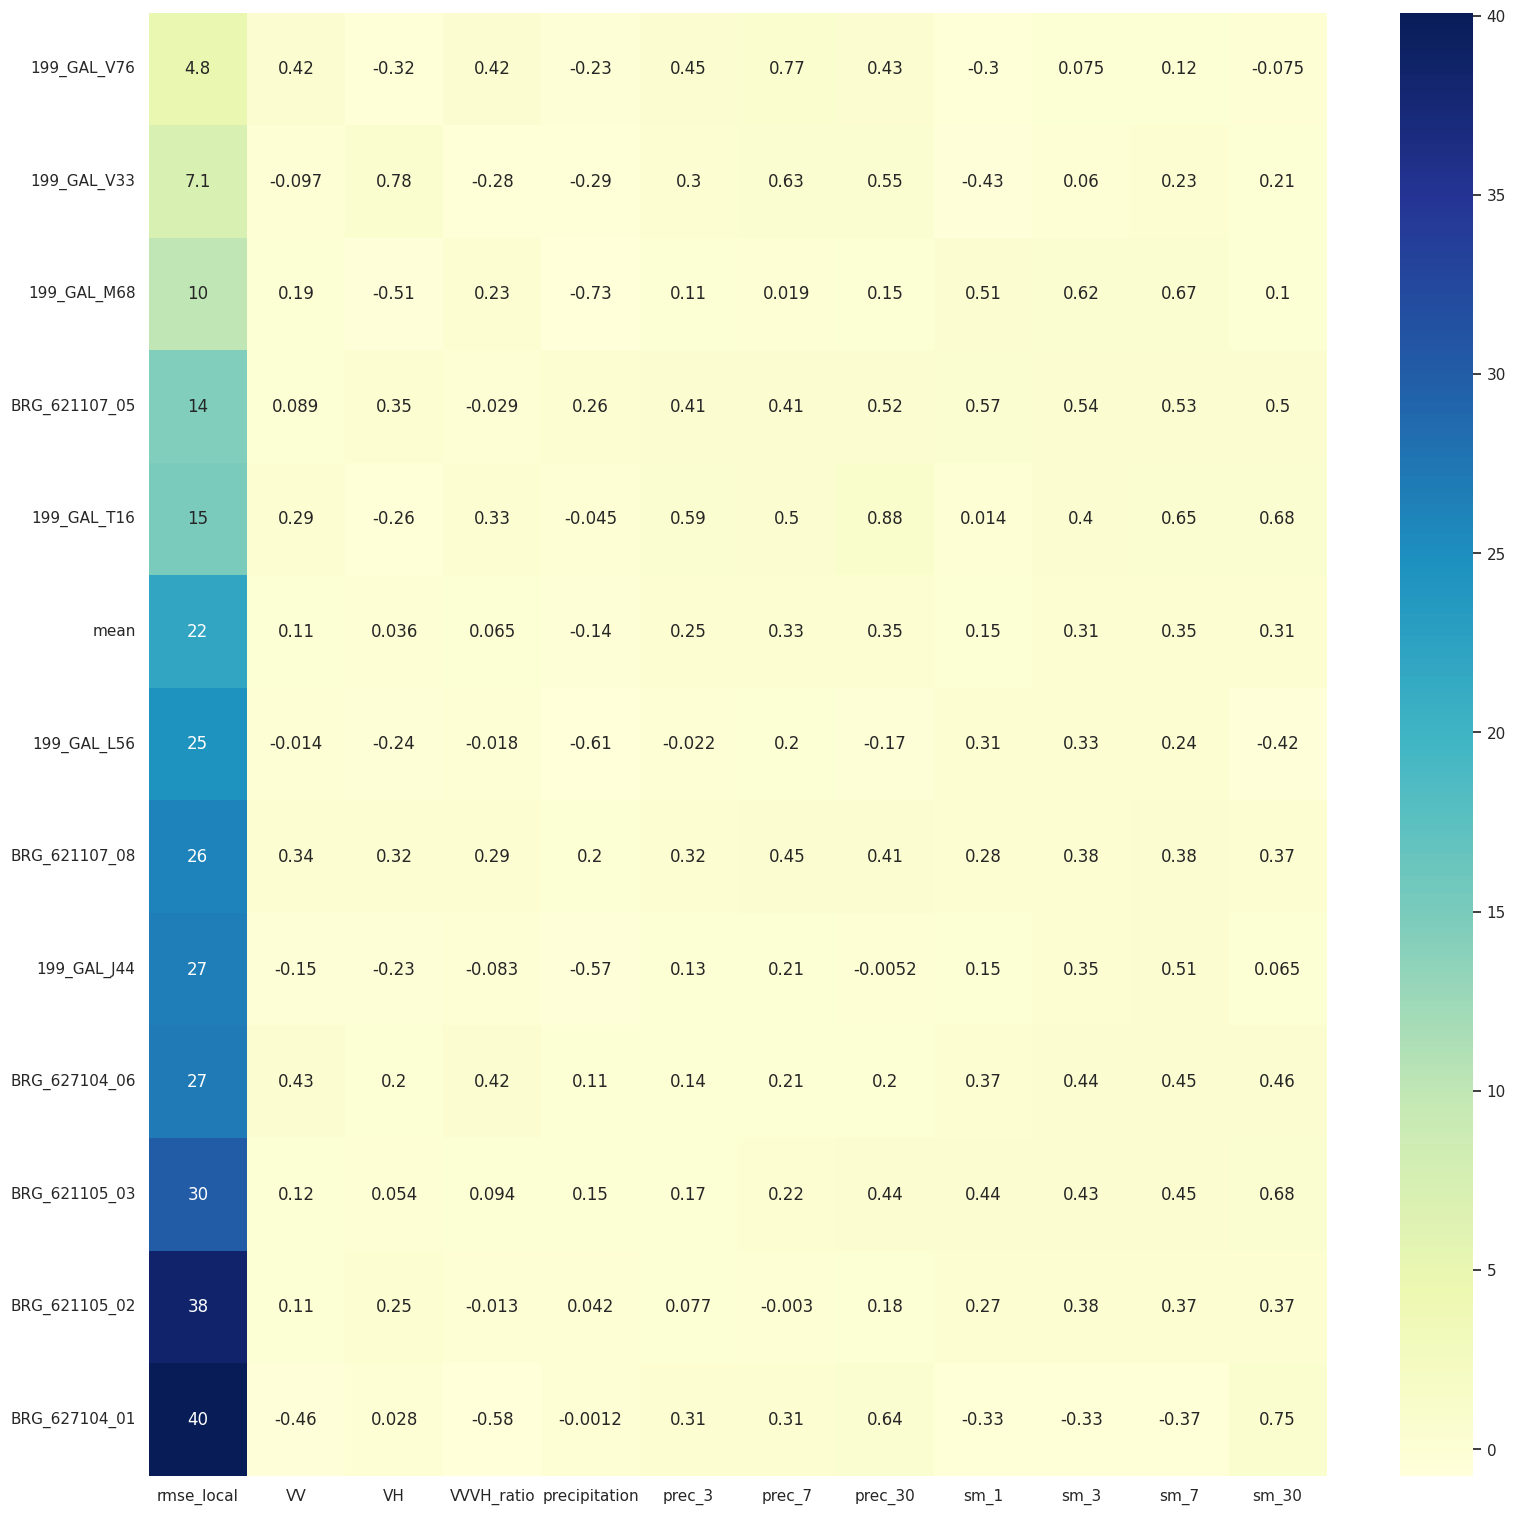

In [27]:
get_heatmap(stats_df, "rmse_local")


In [ ]:
gdf_high.to_file("data/0_shp/kalimantan_best_stations.gpkg", driver="GPKG")
len(gdf_high)

In [ ]:
# ## Save model to file with not pickle (pickle is not safe) 
# import joblib
# model_name = "Best_stations_Kalimantan_163_164_165_173"
# joblib.dump(regr, f"data/10_models/{model_name}.joblib")

In [ ]:
best_worse_stations = stats_df[stats_df.rmse_local < 10].index
best_worse_stations

## Final model bootstraping

In [ ]:
bootstrap_stations = list(best_stations) #+ list(best_worse_stations)

In [ ]:
train_size=0.8
size = int(train_size*len(bootstrap_stations))
print(size)

i = 0
r_list, r2_list, rmse_list = [], [], []
samples_train, samples_test = [], []

i = 0
while i < 100: 

    train_list = np.random.choice(bootstrap_stations, size=size, replace=False)


    gdf_train = training_df[training_df.id.isin(train_list)].copy()

    gdf_test = training_df[
        (training_df.id.isin(bootstrap_stations)) & (~training_df.id.isin(gdf_train.id.unique()))
    ].copy()

    X_train, X_test = gdf_train[explain_vars], gdf_test[explain_vars]
    y_train, y_test = gdf_train[variable], gdf_test[variable]
    
    regr = get_regressor()
    regr.fit(X_train, y_train)
    y_pred_test = regr.predict(X_test)
    
    samples_train.append(len(gdf_train))
    samples_test.append(len(gdf_test))
    r, p = pearsonr(y_test, y_pred_test)
    r_list.append(r)
    r2_list.append(r2_score(y_test, y_pred_test))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    
    i += 1

In [ ]:
pd.DataFrame([
    [np.array(r_list).mean(), np.array(r_list).min(), np.array(r_list).max(), np.median(np.array(r_list))],
    [np.array(r2_list).mean(), np.array(r2_list).min(), np.array(r2_list).max(), np.median(np.array(r2_list))],
    [np.array(rmse_list).mean(), np.array(rmse_list).min(), np.array(rmse_list).max(), np.median(np.array(rmse_list))],
    [np.array(samples_train).mean(), np.array(samples_train).min(), np.array(samples_train).max()],
    [np.array(samples_test).mean(), np.array(samples_test).min(), np.array(samples_test).max()],
],
    index=["r", "r2", "rmse", "samples_train", "samples_test"],
    columns=["mean", "min", "max", "median"]
)


In [ ]:
# Save model to file with not pickle (pickle is not safe) 
import joblib
model_name = "All_but_one_PHU_Kalimantan_high_corr_0_2_temporal_variables"
joblib.dump(regr, f"data/10_models/{model_name}.joblib")
plt.savefig(f"{model_name}.png")

In [ ]:
# open unieqe points geopackage file
unique_points = gpd.read_file("data/0_shp/unique_stations_no_repeated.shp")

# export best estations to geopackage
unique_points[unique_points.id.isin(best_stations)].to_file("data/0_shp/best_kalimantan_corr02_rmse10.gpkg", driver='GPKG')

# # merge the stats_df with the unique_points
# unique_points = unique_points.merge(stats_df, left_on='id', right_index=True)

# # save the unique_points as a geopackage file
# unique_points.to_file("data/0_shp/kalimantan_r_local.gpkg", driver='GPKG')

In [ ]:
stats_df.sort_values(by="r_local", ascending=False).head(10)